In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread
import splitfolders
import cv2
import random
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split

In [17]:
data_dir='/Users/liatkatz/Downloads/lego_output'

In [18]:
train_path=data_dir+'/train'

In [19]:
os.listdir(train_path)

['3005 Brick 1x1',
 '2357 Brick corner 1x2x2',
 '.DS_Store',
 '3024 Plate 1x1',
 '6632 Technic Lever 3M',
 '3794 Plate 1X2 with 1 Knob',
 '3040 Roof Tile 1x2x45deg',
 '11214 Bush 3M friction with Cross axle',
 '18651 Cross Axle 2M with Snap friction',
 '3713 Bush for Cross Axle',
 '32123 half Bush',
 '3022 Plate 2x2',
 '3069 Flat Tile 1x2',
 '3023 Plate 1x2',
 '3004 Brick 1x2',
 '3003 Brick 2x2',
 '3673 Peg 2M']

In [20]:
test_path=data_dir+'/val'

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen=ImageDataGenerator(horizontal_flip=True,
                            vertical_flip=True,
                            rotation_range=360,
                            fill_mode='nearest')

In [23]:
train_generator=image_gen.flow_from_directory(directory=train_path,
                                             target_size=(100,100),
                                             class_mode='categorical',
                                             batch_size=32)

Found 5103 images belonging to 16 classes.


In [24]:
test_image_gen=image_gen.flow_from_directory(directory=test_path,
                                            target_size=(100,100),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

Found 1276 images belonging to 16 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model=Sequential()

model.add(Conv2D(filters=32, input_shape=(100,100,3), activation='relu', kernel_size=(3,3)))
model.add(Conv2D(filters=64, input_shape=(100,100,3), activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
Total params: 18,895,952
Trainable params: 18,895,952
Non-trainable params: 0
__________________________________________

In [31]:
model.fit(train_generator, epochs=25, validation_data=test_image_gen)

Epoch 1/25
160/160 [==============================] - 88s 546ms/step - loss: 12.1004 - accuracy: 0.4985 - val_loss: 0.9849 - val_accuracy: 0.6536
Epoch 2/25
160/160 [==============================] - 89s 557ms/step - loss: 0.9105 - accuracy: 0.6800 - val_loss: 0.8164 - val_accuracy: 0.7171
Epoch 3/25
160/160 [==============================] - 101s 628ms/step - loss: 0.7663 - accuracy: 0.7270 - val_loss: 0.7393 - val_accuracy: 0.7234
Epoch 4/25
160/160 [==============================] - 101s 628ms/step - loss: 0.7236 - accuracy: 0.7304 - val_loss: 0.6993 - val_accuracy: 0.7375
Epoch 5/25
160/160 [==============================] - 112s 698ms/step - loss: 0.6731 - accuracy: 0.7523 - val_loss: 0.6162 - val_accuracy: 0.7602
Epoch 6/25
160/160 [==============================] - 120s 748ms/step - loss: 0.6178 - accuracy: 0.7695 - val_loss: 0.6191 - val_accuracy: 0.7586
Epoch 7/25
160/160 [==============================] - 106s 661ms/step - loss: 0.5948 - accuracy: 0.7801 - val_loss: 0.5767 - 

In [32]:
from tensorflow.keras.models import load_model
model.save('lego_classifier.h5')

In [33]:
accuracies=pd.DataFrame(model.history.history)

In [34]:
accuracies.head()

,loss,accuracy,val_loss,val_accuracy
0,12.100395,0.498530,0.984893,0.653605
1,0.910482,0.679992,0.816387,0.717085
2,0.766331,0.727023,0.739262,0.723354
3,0.723555,0.730355,0.699281,0.737461
4,0.673062,0.752303,0.616162,0.760188


<AxesSubplot:>

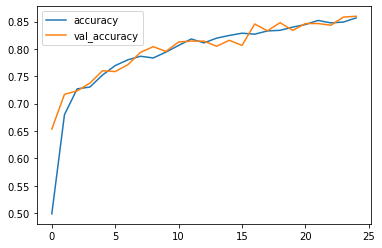

In [35]:
accuracies[['accuracy','val_accuracy']].plot()

In [37]:
from tensorflow.keras.preprocessing import image

In [48]:
train_generator.class_indices

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
pred_probs=model.predict_generator(test_image_gen)

/Users/liatkatz/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [93]:
pred_probs

array([[7.6053500e-01, 2.3923469e-01, 2.7647160e-10, ..., 2.4923934e-09,
        6.7525629e-14, 2.2597218e-04],
       [9.6579748e-01, 1.8150881e-02, 1.1739302e-05, ..., 2.2075842e-08,
        1.3081170e-07, 1.5212496e-02],
       [9.4330931e-01, 5.0501965e-02, 2.1364673e-07, ..., 1.6426681e-09,
        2.3501342e-07, 1.8852084e-03],
       ...,
       [1.3389631e-07, 1.1683076e-07, 8.0876816e-05, ..., 1.5770763e-18,
        1.1475796e-12, 9.9893266e-01],
       [7.8615826e-03, 3.3812623e-02, 4.8201259e-06, ..., 4.3935983e-10,
        1.0864042e-03, 9.4418913e-01],
       [5.6164954e-06, 1.0882467e-06, 6.1430670e-05, ..., 5.5314165e-14,
        1.9951840e-12, 9.5906383e-01]], dtype=float32)

In [94]:
predictions=pred_probs>0.5

In [95]:
predictions

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [101]:
rounders=np.argmax(predictions, axis=1)

In [105]:
confusion_matrix(test_image_gen.classes,rounders)

array([[67,  7,  0,  0,  0,  0,  1,  0,  2,  0,  0,  1,  0,  0,  0,  2],
       [23, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  4],
       [ 1,  0, 73,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2, 75,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0, 69,  0,  1,  0,  0,  6,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 76,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  1,  0, 73,  1,  0,  1,  0,  0,  0,  0,  0,  1],
       [18,  0,  0,  0,  0,  0,  0, 43,  0,  0, 10,  0,  0,  0,  9,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 79,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  9,  5,  0,  1,  0, 58,  2,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  0,  0, 11,  0,  0, 53,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 76,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,

In [147]:
classes=[]

for i in test_image_gen.class_indices.keys():
    classes.append(i)

In [152]:
classes

['11214 Bush 3M friction with Cross axle',
 '18651 Cross Axle 2M with Snap friction',
 '2357 Brick corner 1x2x2',
 '3003 Brick 2x2',
 '3004 Brick 1x2',
 '3005 Brick 1x1',
 '3022 Plate 2x2',
 '3023 Plate 1x2',
 '3024 Plate 1x1',
 '3040 Roof Tile 1x2x45deg',
 '3069 Flat Tile 1x2',
 '32123 half Bush',
 '3673 Peg 2M',
 '3713 Bush for Cross Axle',
 '3794 Plate 1X2 with 1 Knob',
 '6632 Technic Lever 3M']

In [378]:
#This creates a predictor where you enter in the image and it returns which class it belongs to
def img_predictor(image_path):
    see_img=plt.imshow(imread(image_path))
    plt.title("Your Image")
    convert_img=image.load_img(image_path, target_size=(100,100,3)) #converts image to target size
    convert_img=image.img_to_array(convert_img) #converts image to array
    convert_img=np.expand_dims(convert_img, axis=0) #adds another dimension to image in order to be accepted by predictor
    the_prediction=model.predict(convert_img).argmax(axis=-1) #run prediction
    predicted_label=sorted(classes)[the_prediction[0]] #get class name of prediction result, rather than a number
    
    
    for i in model.predict(convert_img):
            class_zip=dict(zip(i, classes))
#     f=plt.figure()
#     f.add_subplot()
#     see_img
#     f.add_subplot()
#     show_the_prediction()
    
    
    
    return "The prediction is: "+ predicted_label, class_zip, see_img#, show_the_prediction()

In [360]:
type(predicted_label)

str

In [366]:
def show_the_prediction():
    if predicted_label=='11214 Bush 3M friction with Cross axle':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/11214 Bush 3M friction with Cross axle/201706171006-0008.png'))
        plt.title("Looks Like This")
    elif predicted_label=='18651 Cross Axle 2M with Snap friction':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/18651 Cross Axle 2M with Snap friction/201706171106-0005.png'))
        plt.title("Looks Like This")
    elif predicted_label=='2357 Brick corner 1x2x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/2357 Brick corner 1x2x2/201706171206-0001.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3003 Brick 2x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3003 Brick 2x2/0005.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3004 Brick 1x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3004 Brick 1x2/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3005 Brick 1x1':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3005 Brick 1x1/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3022 Plate 2x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3022 Plate 2x2/201706161906-0003.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3023 Plate 1x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3023 Plate 1x2/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3024 Plate 1x1':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3024 Plate 1x1/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3040 Roof Tile 1x2x45deg':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3040 Roof Tile 1x2x45deg/201706162106-0006.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3069 Flat Tile 1x2':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3069 Flat Tile 1x2/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='32123 half Bush':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/32123 half Bush/201706171506-0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3673 Peg 2M':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3673 Peg 2M/0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3713 Bush for Cross Axle':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3713 Bush for Cross Axle/201706171506-0005.png'))
        plt.title("Looks Like This")
    elif predicted_label=='3794 Plate 1X2 with 1 Knob':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/3794 Plate 1X2 with 1 Knob/201706161606-0004.png'))
        plt.title("Looks Like This")
    elif predicted_label=='6632 Technic Lever 3M':
        estimated_img=plt.imshow(imread('/Users/liatkatz/Downloads/lego_output/train/6632 Technic Lever 3M/201706171606-0053.png'))
        plt.title("Looks Like This")
    else:
        print("No Match Detected!")

In [379]:
brick_3003='/Users/liatkatz/Downloads/3003 brick.png'

('The prediction is: 3003 Brick 2x2',
 {0.08882796: '11214 Bush 3M friction with Cross axle',
  0.0752949: '18651 Cross Axle 2M with Snap friction',
  0.11315472: '2357 Brick corner 1x2x2',
  0.5451814: '3003 Brick 2x2',
  0.024143675: '3004 Brick 1x2',
  0.0065643187: '3005 Brick 1x1',
  0.009044534: '3022 Plate 2x2',
  0.0019641584: '3023 Plate 1x2',
  0.0034092218: '3024 Plate 1x1',
  0.0047388272: '3040 Roof Tile 1x2x45deg',
  0.0147529375: '3069 Flat Tile 1x2',
  0.0025086605: '32123 half Bush',
  0.0014136545: '3673 Peg 2M',
  0.0045260615: '3713 Bush for Cross Axle',
  0.00074444787: '3794 Plate 1X2 with 1 Knob',
  0.10373056: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3cfe5bee0>)

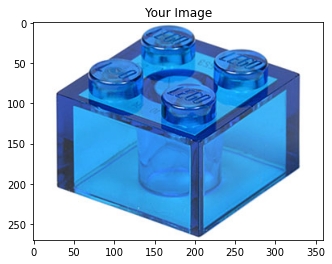

In [394]:
img_predictor(brick_3003)

In [351]:
brick_corner='/Users/liatkatz/Downloads/brick_corner.jpeg'

('The prediction is: 2357 Brick corner 1x2x2',
 {0.0007503105: '11214 Bush 3M friction with Cross axle',
  0.002629827: '18651 Cross Axle 2M with Snap friction',
  0.6863403: '2357 Brick corner 1x2x2',
  0.1803054: '3003 Brick 2x2',
  0.114830084: '3004 Brick 1x2',
  6.158707e-05: '3005 Brick 1x1',
  0.0024960777: '3022 Plate 2x2',
  6.2047284e-06: '3023 Plate 1x2',
  3.3404666e-07: '3024 Plate 1x1',
  0.00016078216: '3040 Roof Tile 1x2x45deg',
  7.2762305e-05: '3069 Flat Tile 1x2',
  3.1045115e-06: '32123 half Bush',
  3.6042115e-07: '3673 Peg 2M',
  8.981076e-08: '3713 Bush for Cross Axle',
  3.1110744e-07: '3794 Plate 1X2 with 1 Knob',
  0.01234256: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3c78b93a0>)

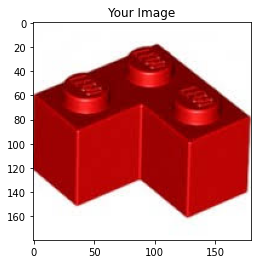

In [381]:
img_predictor(brick_corner)

In [404]:
piece_3022='/Users/liatkatz/Downloads/3022.png'

('The prediction is: 3003 Brick 2x2',
 {0.075977765: '11214 Bush 3M friction with Cross axle',
  0.03793138: '18651 Cross Axle 2M with Snap friction',
  0.042034484: '2357 Brick corner 1x2x2',
  0.7313902: '3003 Brick 2x2',
  0.008936417: '3004 Brick 1x2',
  0.019038891: '3005 Brick 1x1',
  0.012989695: '3022 Plate 2x2',
  0.0019907313: '3023 Plate 1x2',
  0.0028590453: '3024 Plate 1x1',
  0.008415355: '3040 Roof Tile 1x2x45deg',
  0.007001523: '3069 Flat Tile 1x2',
  0.0053630495: '32123 half Bush',
  0.00046000752: '3673 Peg 2M',
  0.0023697459: '3713 Bush for Cross Axle',
  0.0008343773: '3794 Plate 1X2 with 1 Knob',
  0.042407356: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3d97610a0>)

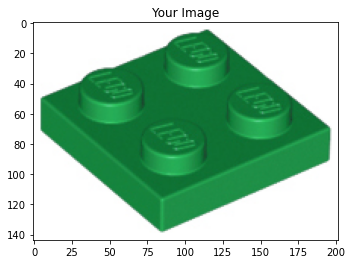

In [405]:
img_predictor(piece_3022)

In [406]:
cross_axle='/Users/liatkatz/Downloads/11214.png'

('The prediction is: 11214 Bush 3M friction with Cross axle',
 {0.10234374: '11214 Bush 3M friction with Cross axle',
  0.06695838: '18651 Cross Axle 2M with Snap friction',
  0.062573545: '2357 Brick corner 1x2x2',
  0.050800793: '3003 Brick 2x2',
  0.055062328: '3004 Brick 1x2',
  0.04395838: '3005 Brick 1x1',
  0.06291061: '3022 Plate 2x2',
  0.08466816: '3023 Plate 1x2',
  0.07995077: '3024 Plate 1x1',
  0.049280632: '3040 Roof Tile 1x2x45deg',
  0.08409612: '3069 Flat Tile 1x2',
  0.047309197: '32123 half Bush',
  0.029005285: '3673 Peg 2M',
  0.03131452: '3713 Bush for Cross Axle',
  0.07436179: '3794 Plate 1X2 with 1 Knob',
  0.07540574: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3d1994820>)

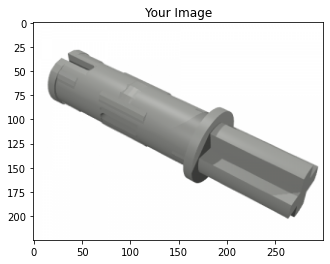

In [407]:
img_predictor(cross_axle)

('The prediction is: 11214 Bush 3M friction with Cross axle',
 {0.8193866: '11214 Bush 3M friction with Cross axle',
  0.1470755: '18651 Cross Axle 2M with Snap friction',
  7.7752906e-05: '2357 Brick corner 1x2x2',
  0.019715233: '3003 Brick 2x2',
  0.00023308025: '3004 Brick 1x2',
  0.0021370735: '3005 Brick 1x1',
  0.00698184: '3022 Plate 2x2',
  0.00022835509: '3023 Plate 1x2',
  2.888211e-05: '3024 Plate 1x1',
  1.5044279e-05: '3040 Roof Tile 1x2x45deg',
  2.1023436e-06: '3069 Flat Tile 1x2',
  0.0016478872: '32123 half Bush',
  2.9377711e-06: '3673 Peg 2M',
  9.399299e-06: '3713 Bush for Cross Axle',
  1.1834331e-07: '3794 Plate 1X2 with 1 Knob',
  0.0024581738: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3d376da60>)

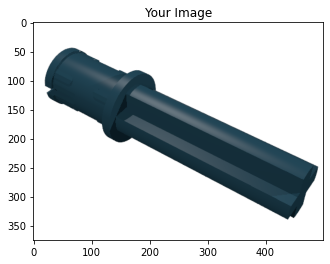

In [409]:
snapper='/Users/liatkatz/Downloads/snap.png'
img_predictor(snapper)

('The prediction is: 3040 Roof Tile 1x2x45deg',
 {0.031815335: '11214 Bush 3M friction with Cross axle',
  0.016634401: '18651 Cross Axle 2M with Snap friction',
  0.028601464: '2357 Brick corner 1x2x2',
  0.034856334: '3003 Brick 2x2',
  0.016889282: '3004 Brick 1x2',
  0.23058335: '3005 Brick 1x1',
  0.042652376: '3022 Plate 2x2',
  0.023237452: '3023 Plate 1x2',
  0.0371927: '3024 Plate 1x1',
  0.39819953: '3040 Roof Tile 1x2x45deg',
  0.019102724: '3069 Flat Tile 1x2',
  0.08421941: '32123 half Bush',
  0.013786802: '3673 Peg 2M',
  0.00048730828: '3713 Bush for Cross Axle',
  0.017387068: '3794 Plate 1X2 with 1 Knob',
  0.004354515: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3d5296b20>)

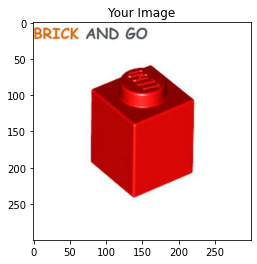

In [411]:
single_brick='/Users/liatkatz/Downloads/3005.jpeg'
img_predictor(single_brick)

('The prediction is: 3003 Brick 2x2',
 {0.0023491383: '11214 Bush 3M friction with Cross axle',
  0.00173773: '18651 Cross Axle 2M with Snap friction',
  0.012925671: '2357 Brick corner 1x2x2',
  0.9586641: '3003 Brick 2x2',
  0.00063017284: '3004 Brick 1x2',
  3.4734599e-06: '3005 Brick 1x1',
  0.023153344: '3022 Plate 2x2',
  2.5436346e-05: '3023 Plate 1x2',
  1.1203717e-06: '3024 Plate 1x1',
  0.0003319291: '3040 Roof Tile 1x2x45deg',
  3.647924e-05: '3069 Flat Tile 1x2',
  6.3588254e-06: '32123 half Bush',
  7.245425e-06: '3673 Peg 2M',
  6.8620748e-06: '3713 Bush for Cross Axle',
  6.3524095e-07: '3794 Plate 1X2 with 1 Knob',
  0.00012031395: '6632 Technic Lever 3M'},
 <matplotlib.image.AxesImage at 0x7fb3d116f2e0>)

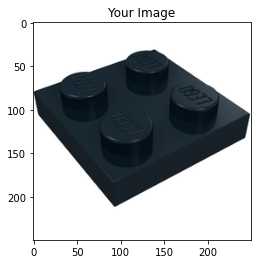

In [414]:
piece_3022_1='/Users/liatkatz/Downloads/3022_1.png'
img_predictor(piece_3022_1)